In [2]:
import tensorflow as tf
#models and layers are methods that we imported from tensorflow 
#to train the models and by providing layers
from tensorflow.keras import models, layers 
#to plot the graphs and charts
import matplotlib.pyplot as plt
# from IPython.display import HTML

In [3]:
BATCH_SIZE = 32 # 1 batch=32 images
IMAGE_SIZE = 256 # pixels of image dataset
CHANNELS=3 # RGB
EPOCHS=5 #iterations of model, increasing iterations increase accuracy

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "VegNet", # dataset folder name
    shuffle=True, # randomly shuffling of images
    image_size=(IMAGE_SIZE,IMAGE_SIZE), # 256*256
    batch_size=BATCH_SIZE # assigning batch size 32 into batch_size variable
)

Found 6150 files belonging to 19 classes.


In [5]:
class_names = dataset.class_names
class_names

['Bell Pepper_Damaged',
 'Bell Pepper_Dried',
 'Bell Pepper_Old',
 'Bell Pepper_Ripe',
 'Bell Pepper_Unripe',
 'Chile Pepper_Damaged',
 'Chile Pepper_Dried',
 'Chile Pepper_Old',
 'Chile Pepper_Ripe',
 'Chile Pepper_Unripe',
 'New Mexico Green Chile_Damaged',
 'New Mexico Green Chile_Dried',
 'New Mexico Green Chile_Old',
 'New Mexico Green Chile_Ripe',
 'New Mexico Green Chile_Unripe',
 'Tomato_Damaged',
 'Tomato_Old',
 'Tomato_Ripe',
 'Tomato_Unripe']

In [6]:
len(dataset)

193

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[17 17 18 14 17 16  6  1 16 12 16 11  1 17 17 13  9  1  6 12  8  6 16 16
 16 11  1 16  3  3 13 14]


In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[210. 210. 208.]
  [211. 211. 209.]
  [211. 211. 209.]
  ...
  [169. 170. 162.]
  [166. 167. 159.]
  [164. 165. 157.]]

 [[211. 211. 209.]
  [211. 211. 209.]
  [211. 211. 209.]
  ...
  [169. 170. 162.]
  [166. 167. 159.]
  [164. 165. 157.]]

 [[211. 211. 209.]
  [211. 211. 209.]
  [212. 212. 210.]
  ...
  [170. 171. 163.]
  [167. 168. 160.]
  [165. 166. 158.]]

 ...

 [[194. 190. 189.]
  [193. 189. 188.]
  [192. 188. 187.]
  ...
  [160. 152. 150.]
  [158. 150. 148.]
  [156. 148. 146.]]

 [[193. 189. 188.]
  [192. 188. 187.]
  [191. 187. 186.]
  ...
  [159. 151. 149.]
  [157. 149. 147.]
  [155. 147. 145.]]

 [[193. 189. 188.]
  [192. 188. 187.]
  [190. 186. 185.]
  ...
  [158. 150. 148.]
  [156. 148. 146.]
  [154. 146. 144.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[182. 183. 178.]
  [181. 182. 177.]
  [182. 183. 178.]
  ...
  [192. 191. 196.]
  [191. 190. 195.]
  [192. 191. 196.]]

 [[181. 182. 177.]
  [181. 182. 177.]
  [182. 183. 178.]
  ...
  [193. 192. 197.]
  [192. 191. 196.]
  [193. 192. 197.]]

 [[180. 181. 176.]
  [181. 182. 177.]
  [182. 183. 178.]
  ...
  [194. 193. 198.]
  [194. 193. 198.]
  [195. 194. 199.]]

 ...

 [[176. 170. 172.]
  [177. 171. 173.]
  [178. 172. 174.]
  ...
  [181. 179. 182.]
  [179. 177. 180.]
  [177. 175. 178.]]

 [[175. 169. 171.]
  [176. 170. 172.]
  [177. 171. 173.]
  ...
  [180. 178. 181.]
  [178. 176. 179.]
  [177. 175. 178.]]

 [[175. 169. 171.]
  [175. 169. 171.]
  [177. 171. 173.]
  ...
  [180. 178. 181.]
  [178. 176. 179.]
  [176. 174. 177.]]]


In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


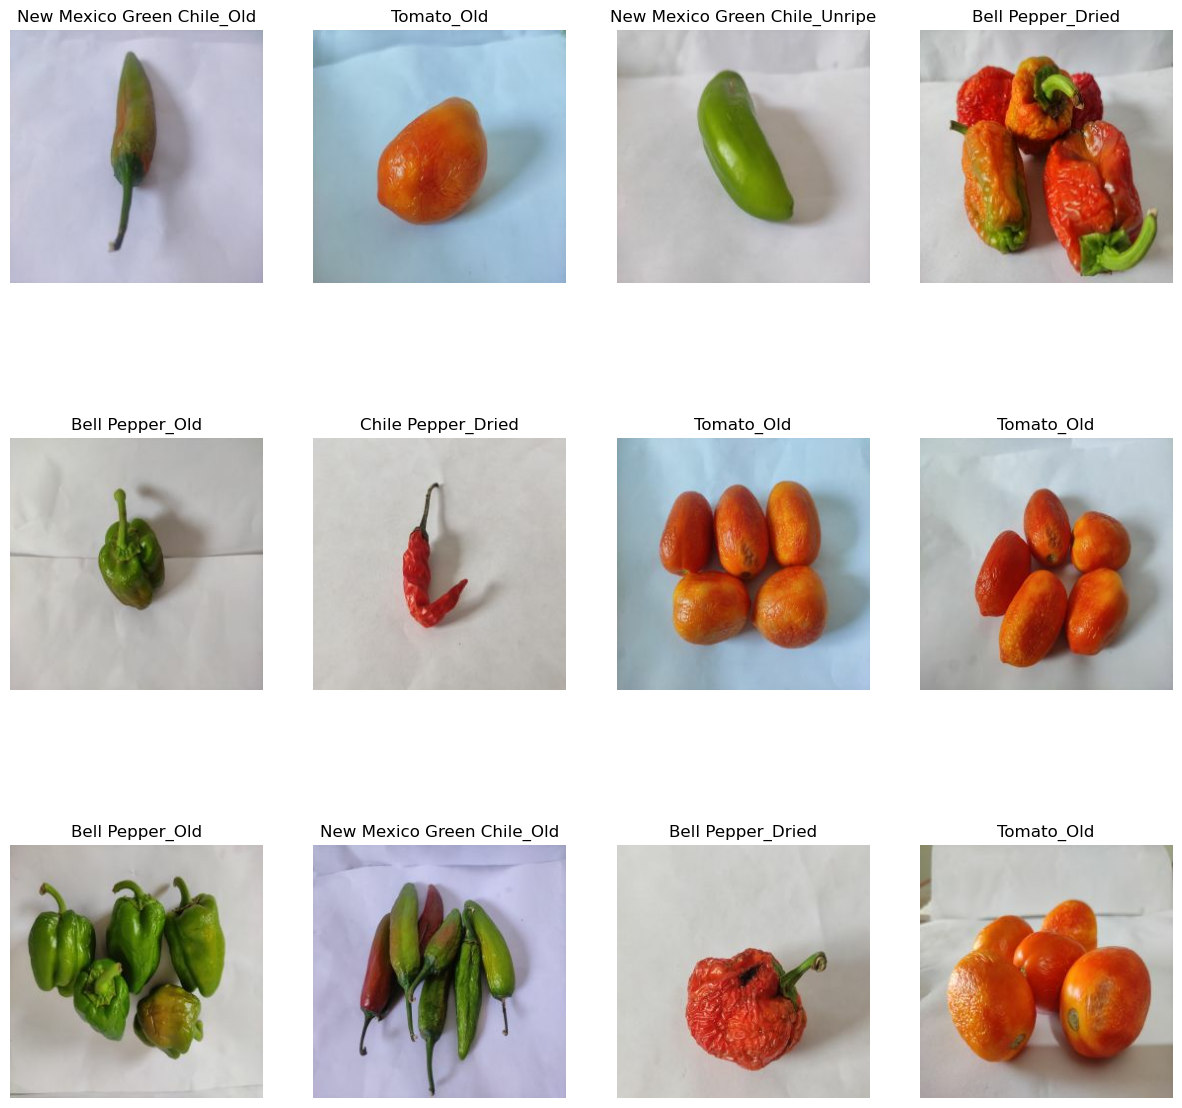

In [11]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [12]:
train_size = 0.8
len(dataset)*train_size

154.4

In [13]:
train_ds = dataset.take(154)
len(train_ds)

154

In [14]:
test_ds = dataset.skip(154)
len(test_ds)

39

In [15]:
val_size=0.1
len(dataset)*val_size

19.3

In [16]:
val_ds = test_ds.take(19)
len(val_ds)

19

In [17]:
test_ds = test_ds.skip(19)
len(test_ds)

20

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

154

In [21]:
len(val_ds)

19

In [22]:
len(test_ds)

20

### Cache, Shuffle, and Prefetch the Dataset

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation
Data Augmentation is needed when we have less data,
this boosts the accuracy of our model by augmenting the data.

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

#### Applying Data Augmentation to Train Dataset

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 19

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/5
154/154 [==============================] - 520s 3s/step - loss: 2.0949 - accuracy: 0.3133 - val_loss: 1.7486 - val_accuracy: 0.3388
Epoch 2/5
154/154 [==============================] - 171s 1s/step - loss: 1.3991 - accuracy: 0.4857 - val_loss: 1.3252 - val_accuracy: 0.4737
Epoch 3/5
154/154 [==============================] - 54s 345ms/step - loss: 1.1616 - accuracy: 0.5608 - val_loss: 1.2561 - val_accuracy: 0.5115
Epoch 4/5
154/154 [==============================] - 44s 283ms/step - loss: 0.9999 - accuracy: 0.6116 - val_loss: 1.0063 - val_accuracy: 0.6250
Epoch 5/5
154/154 [==============================] - 42s 274ms/step - loss: 0.8405 - accuracy: 0.6724 - val_loss: 0.9652 - val_accuracy: 0.6316


In [31]:
import gradio as gr
def predict_image(img):
    img_3d=img.reshape(-1, 224,224, 3)
    prediction=model.predict(img_3d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(19)}

In [32]:
image=gr.inputs.Image(shape=(224,224))
label= gr.outputs.Label(19)
gr.Interface(fn=predict_image, inputs=image,
             outputs=label, capture_session=True).launch(debug='True')

C:\Users\Netwo\anaconda3\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Netwo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Netwo\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Netwo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
C:\Users\Netwo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 190ms/step
Keyboard interruption in main thread... closing server.


In [80]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 99s 212ms/step - loss: 0.9083 - accuracy: 0.6406


In [81]:
scores

[0.9083029627799988, 0.640625]

In [82]:
history

In [83]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 154}

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
history.history['accuracy']

[0.28478172421455383,
 0.4337005317211151,
 0.5163198709487915,
 0.5909832715988159,
 0.660138726234436]

In [86]:
len(history.history['accuracy'])

5

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

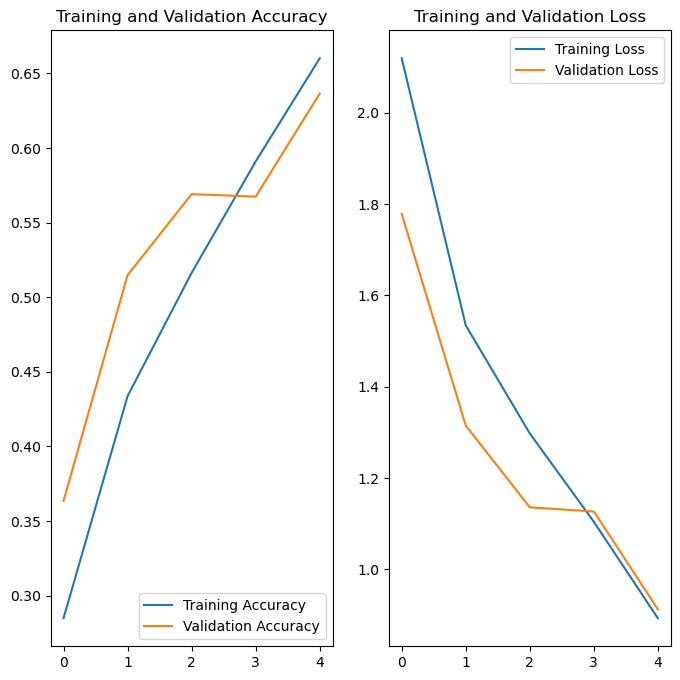

In [88]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Old
1/1 [==============================] - 5s 5s/step
predicted label: Tomato_Old


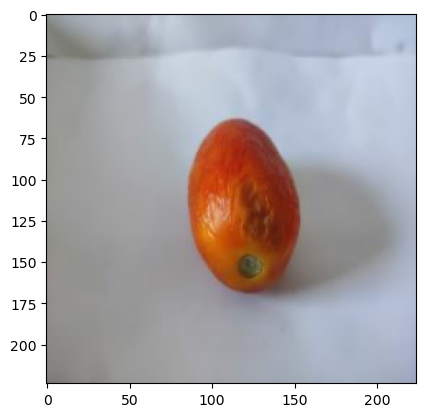

In [89]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 88ms/step


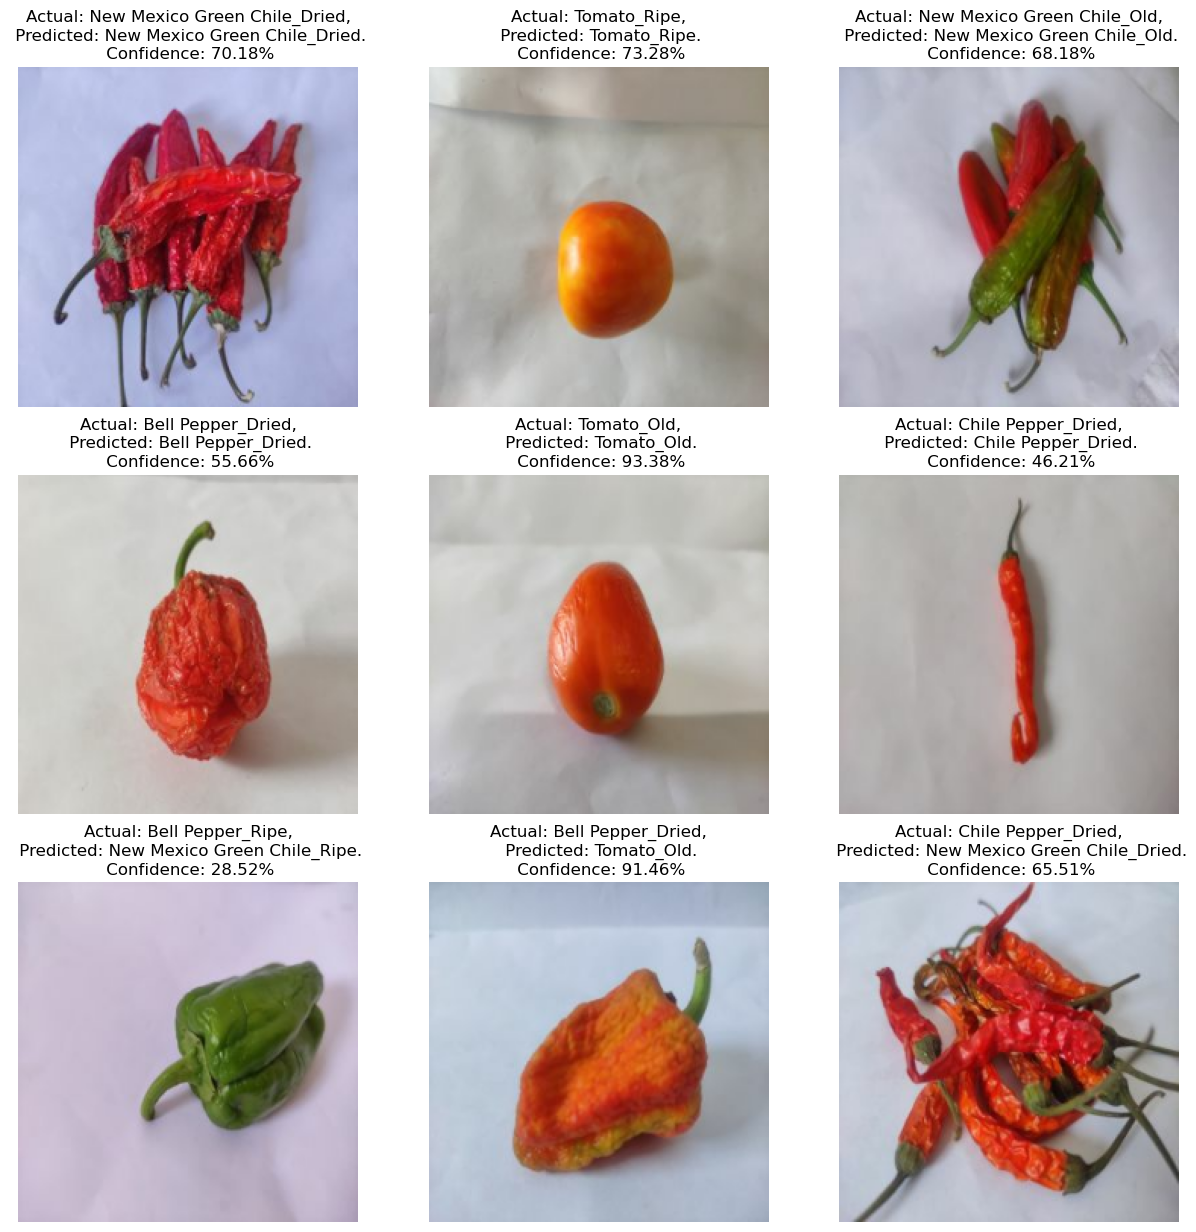

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [42]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/Netwo/TrainingDataSet/Saved_Models") + [0]])+1
model.save(f"C:/Users/Netwo/TrainingDataSet/Saved_Models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/Netwo/TrainingDataSet/Saved_Models/4\assets


INFO:tensorflow:Assets written to: C:/Users/Netwo/TrainingDataSet/Saved_Models/4\assets
